## Assignment 3: The goal of this assignment is to manipulate data using the Titanic Dataset

### The code chunk below loads in the titanic dataset and corrects the Survived and Pclass variables.

In [23]:
library(ggplot2)
titanic = read.csv("titanic.csv")
titanic$Survived=factor(titanic$Survived)
titanic$Pclass = factor(titanic$Pclass)

### This piece of code identifies the total number of missing variables, shows that they are all in the Age column, replaces the missing data with the mean age, and shows that there is no longer any missing data.

In [24]:
sum(is.na(titanic))
sum(is.na(titanic$Age))
titanic[is.na(titanic$Age),]$Age = mean(titanic$Age, na.rm =TRUE)
sum(is.na(titanic))

[1] 177

[1] 177

[1] 0

### This code chunk removes unneccesary columns.

In [25]:
titanic$Name = NULL
titanic$PassengerId = NULL
titanic$Cabin = NULL
titanic$Ticket = NULL

### This code chunk calculates mean and median statistics under various conditions

In [26]:
mean(titanic$Age) 
mean(titanic[titanic$Sex == "female",]$Age)
median(titanic[titanic$Pclass == 1,]$Fare)
median(titanic[!titanic$Pclass == 1 & titanic$Sex == "female",]$Fare)
median(titanic[titanic$Pclass == 1|2 & titanic$Sex == "female",]$Age)
mean(titanic[titanic$Sex == "female" & titanic$Survived == 1 & titanic$Age >= 13 & titanic$Age <=19, ]$Fare)
mean(titanic[titanic$Sex == "female" & titanic$Survived == 1 & titanic$Age >= 13 & titanic$Age <=19 & titanic$Pclass == 1, ]$Fare)
mean(titanic[titanic$Sex == "female" & titanic$Survived == 1 & titanic$Age >= 13 & titanic$Age <=19 & titanic$Pclass == 2, ]$Fare)
mean(titanic[titanic$Sex == "female" & titanic$Survived == 1 & titanic$Age >= 13 & titanic$Age <=19 & titanic$Pclass == 3, ]$Fare)

[1] 29.69912

[1] 28.21673

[1] 60.2875

[1] 14.45625

[1] 29.69912

[1] 49.17966

[1] 107.5407

[1] 20.00885

[1] 8.769885

### Calculates the ratio of Survived:Not Survived for above average fare

In [27]:
titanicHighFareSurvived  = titanic[titanic$Fare >= mean(titanic$Fare) & titanic$Survived == 1, ] 
titanicHighFareDeceased  = titanic[titanic$Fare >= mean(titanic$Fare) & titanic$Survived == 0, ] 
nrow(titanicHighFareSurvived) / nrow(titanicHighFareDeceased)

[1] 1.482353

### Creates standardized fare variable

In [28]:
titanic$sfare = ((titanic$Fare - mean(titanic$Fare)) / sd(titanic$Fare))

### Plots variables Sex and Survived for passengers younger than the average age

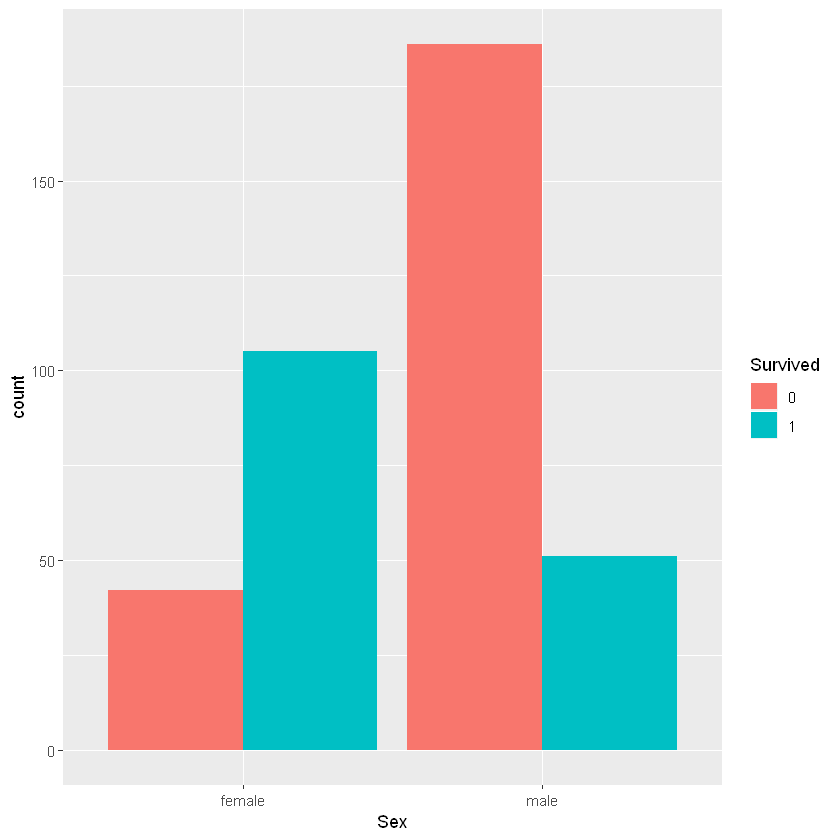

In [29]:
titanicyoung = titanic[titanic$Age < mean(titanic$Age),]
ggplot(titanicyoung) + geom_bar(mapping = aes(x=Sex, fill = Survived), position= "dodge")

### Plots the density of age for those who survived and paid above average fare.

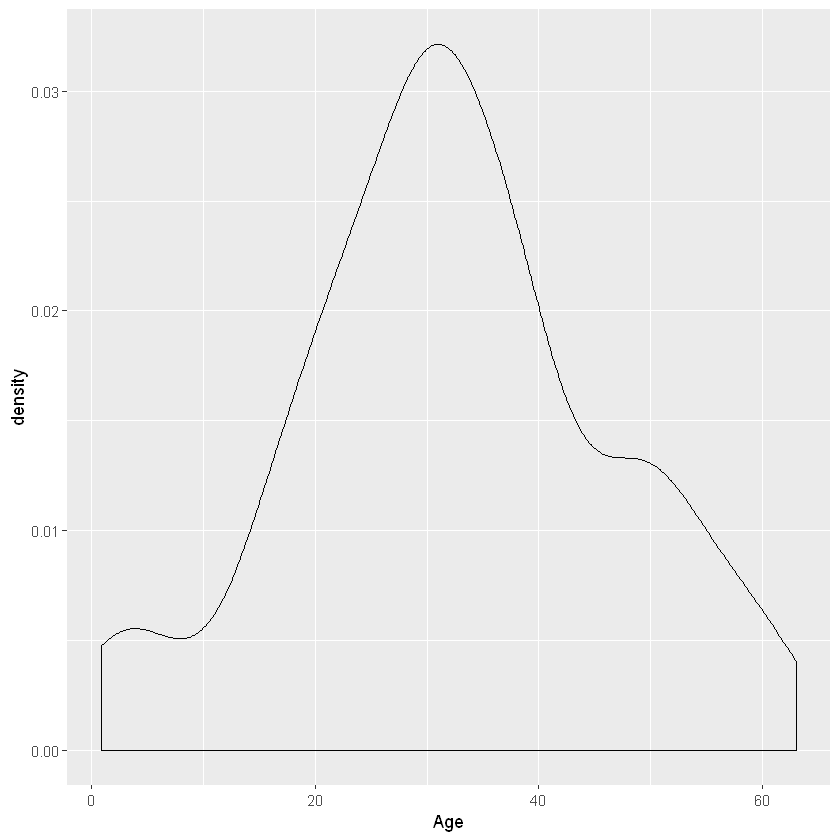

In [30]:
ggplot(titanicHighFareSurvived) + geom_density(mapping = aes(x=Age, color = NULL))

### Plots two density age curves in one graph for SouthHampton and Queenstown

Warning message in `==.default`(titanic$Embarked, c("S", "Q")):
"longer object length is not a multiple of shorter object length"Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"

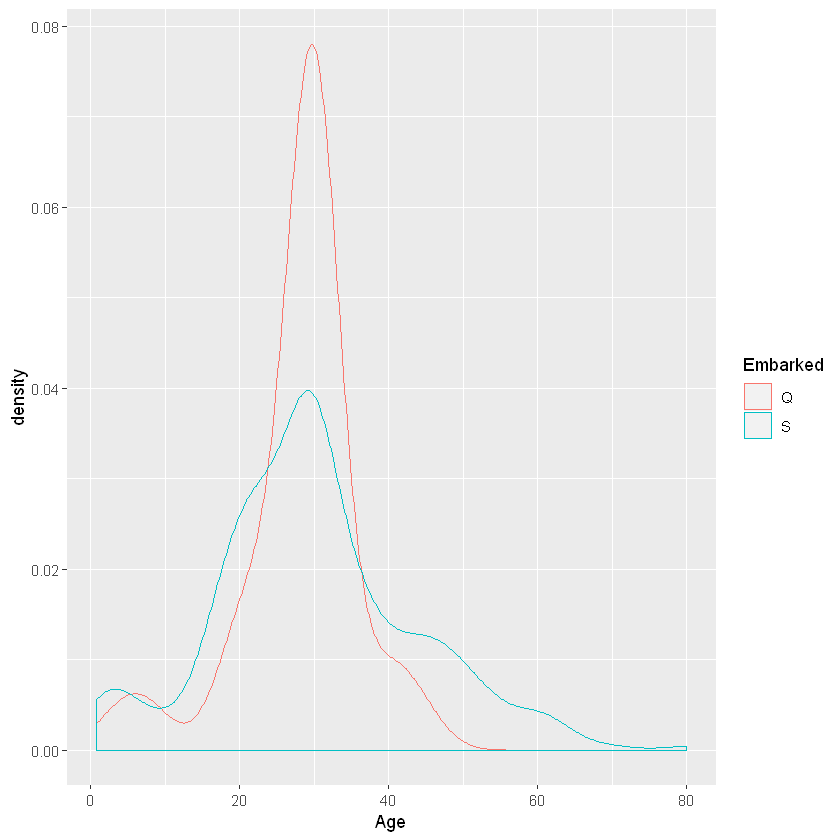

In [31]:
titanicSQ = titanic[titanic$Embarked == c("S","Q") , ]
ggplot(titanicSQ) + geom_density(mapping = aes(x=Age, color = Embarked))

### Creates cfare variable that classifies whether a fare is cheap or expensive

In [32]:
titanic$cfare = ifelse(titanic$Fare < mean(titanic$Fare),{"Cheap"},{"Expensive"})

### Creates new variable that classifies age

In [33]:
titanic$cage = cut(titanic$Age, breaks= c(0,10,20,30,40,50,60,70,80,90,100), labels = c(0,1,2,3,4,5,6,7,8,9))

### Plots bar chart for variables cage and Survived for passengers who bought expensive tickets.

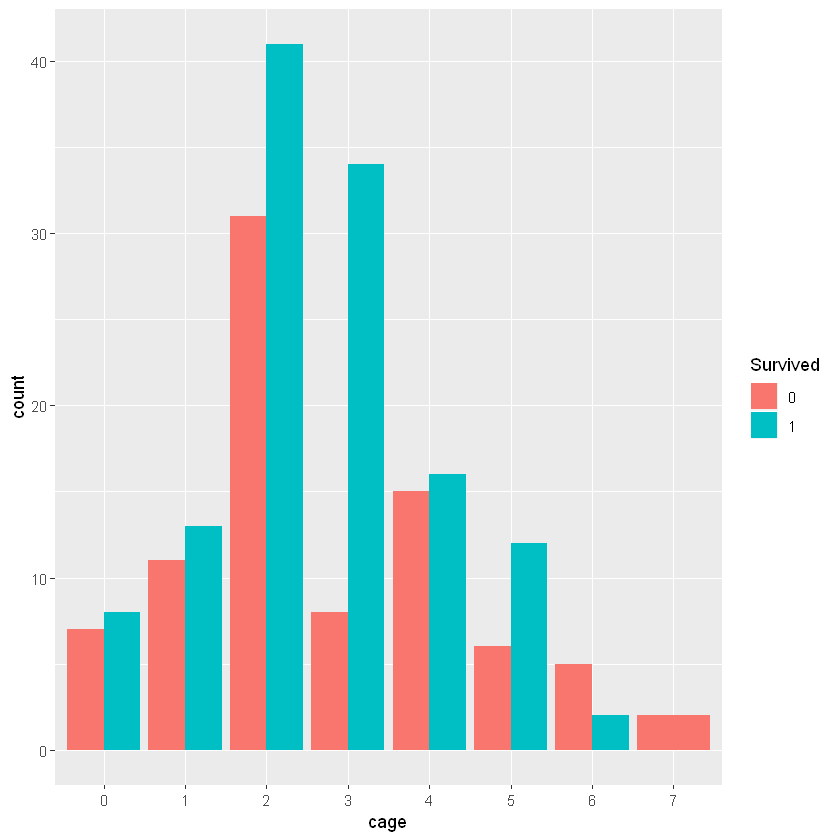

In [34]:
titanicexpensive = titanic[titanic$cfare == "Expensive",]
ggplot(titanicexpensive) + geom_bar(mapping = aes(x=cage, fill = Survived), position= "dodge")

### Splits the bar chart from previous code by Pclass

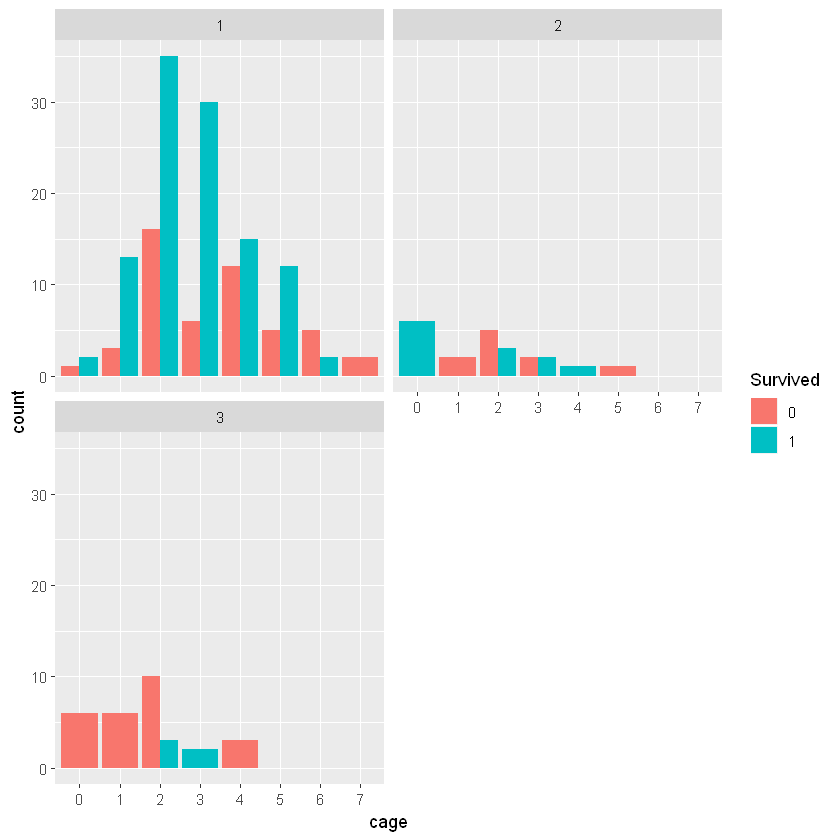

In [35]:
titanicexpensive = titanic[titanic$cfare == "Expensive",]
ggplot(titanicexpensive) + geom_bar(mapping = aes(x=cage, fill = Survived), position= "dodge") + 
 facet_wrap(~ Pclass, nrow = 2)